In [24]:
import networkx as nx
from utils import *
import matplotlib.pyplot as plt
import random
import collections




num_runs = 100
num_nodes = 100

greens = []
reds = []
yellows = []
oranges = []

payment_chain_lengths = []

payments_to_seller = []

num_small_loops = int(num_runs / 10)

for _ in range(10):

    for __ in range(num_small_loops):


        G = nx.connected_watts_strogatz_graph(num_nodes, 3, 1)

        valuations = {}
        for i in range(len(G.nodes)):
            valuations[i] = {"valuation": random.randint(0, 100)}
        valuations[0] = {"valuation": 0}

        nx.set_node_attributes(G, valuations)

        w = get_w(valuations)
        C = get_C(G, w)

        exposed = set()
        for i in C:
            for n in G.neighbors(i):
                if n not in exposed and n not in C:
                    exposed.add(n)

        color_map = []
        for i in G.nodes:
            if i == 0:
                color_map.append('yellow')
                continue
            if i in C:
                color_map.append('red')
            elif i in exposed:
                color_map.append('orange')
            else:
                color_map.append('green')

        p = get_payments(G, C, w)

        a = get_allocation(G, C, p)

        final_p = get_final_payments(G, C, a, p)


        # ------------------------------------------------------------

        counter = collections.Counter(color_map)

        yellows.append(counter['yellow'])
        greens.append(counter['green'])
        oranges.append(counter['orange'])
        reds.append(counter['red'])

        payment_chain_length = len(final_p)

        payment_chain_lengths.append(payment_chain_length)

        if payment_chain_length != 0:
            payments_to_seller.append([final_p[i] for i in final_p if 0 in i][0])
        else:
            payments_to_seller.append(0)
            
    print("%s %% done" % ((_+1) * 10))



10 % done
20 % done
30 % done
40 % done
50 % done
60 % done
70 % done
80 % done
90 % done
100 % done


0.7820999999999999
0.10619999999999999
0.1017
0.01
3.93
43.14


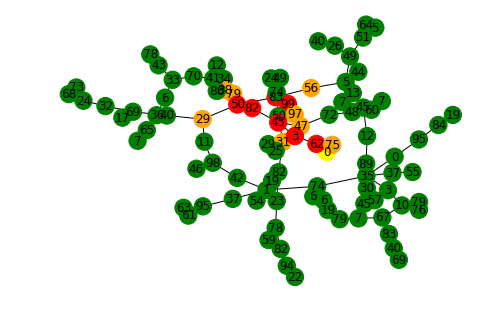

In [25]:
nx.draw(G, node_color=color_map, with_labels=True, labels=nx.get_node_attributes(G, 'valuation'))

print(sum(greens) / num_nodes / num_runs)
print(sum(oranges) / num_nodes / num_runs)
print(sum(reds) / num_nodes / num_runs)
print(sum(yellows) / num_nodes / num_runs)
print(sum(payment_chain_lengths) / num_runs)
print(sum(payments_to_seller) / num_runs)


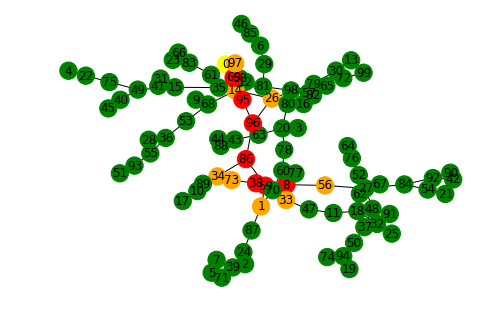

In [26]:
nx.draw(G, node_color=color_map, with_labels=True)